In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df1=pd.read_csv('../Data/Raw/review1', encoding='utf-8-sig')
df2=pd.read_csv('../Data/Raw/review2', encoding='utf-8-sig')
df3=pd.read_csv('../Data/Raw/review3', encoding='utf-8-sig')
df4=pd.read_csv('../Data/Raw/review4', encoding='utf-8-sig')
df5=pd.read_csv('../Data/Raw/review5', encoding='utf-8-sig')
df6=pd.read_csv('../Data/Raw/review6', encoding='utf-8-sig')
df7=pd.read_csv('../Data/Raw/review7', encoding='utf-8-sig')

In [19]:
combined_df=pd.concat([df1,df2,df3,df4,df5,df6,df7],ignore_index=True)
print(combined_df)

                                                 review  rating
0     Overall, this laptop stand does the job, but t...       4
1     Product is good and functions nice. Rubber att...       4
2     quality 105% best lageyo ani finishing pani dh...       5
3     Well it works well . It's really good for gami...       5
4     The product is exact as shown in the picture. ...       4
...                                                 ...     ...
1666                                            nice ☺️       5
1667                                               nice       5
1668                                               good       4
1669                                               nice       5
1670                                               Nice       5

[1671 rows x 2 columns]


In [20]:
def change_rating_to_sentiment(rating):
    if rating==4 or rating==5:
        return "Positive"
    if rating==3:
        return "Neutral"
    else:
        return "Negative"

In [21]:
combined_df['rating']=combined_df['rating'].apply(change_rating_to_sentiment)

In [22]:
combined_df.tail(100)

,review,rating
1571,does the job 💯,Positive
1572,woww I like it,Positive
1573,nice I like it,Positive
1574,feel good 👍👍,Positive
1575,was little big,Positive
...,...,...
1666,nice ☺️,Positive
1667,nice,Positive
1668,good,Positive
1669,nice,Positive


In [23]:

combined_df['rating'].value_counts()

rating
Positive    1485
Negative     106
Neutral       80
Name: count, dtype: int64

In [24]:
combined_df.duplicated().sum()
combined_df.drop_duplicates(inplace=True)
combined_df.duplicated().sum()
combined_df['rating'].value_counts()

rating
Positive    1342
Negative     106
Neutral       80
Name: count, dtype: int64

In [25]:
combined_df['review'] = combined_df['review'].str.replace('\n', '', regex=False)


In [26]:
combined_df.to_csv('../Data/sentiment.csv',index=False)

<BarContainer object of 3 artists>

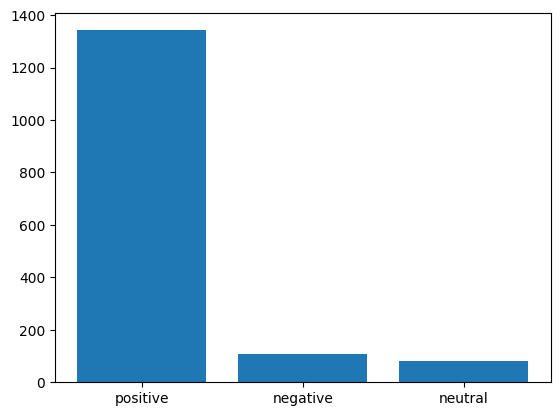

In [27]:
plt.bar(['positive','negative','neutral'],combined_df['rating'].value_counts())

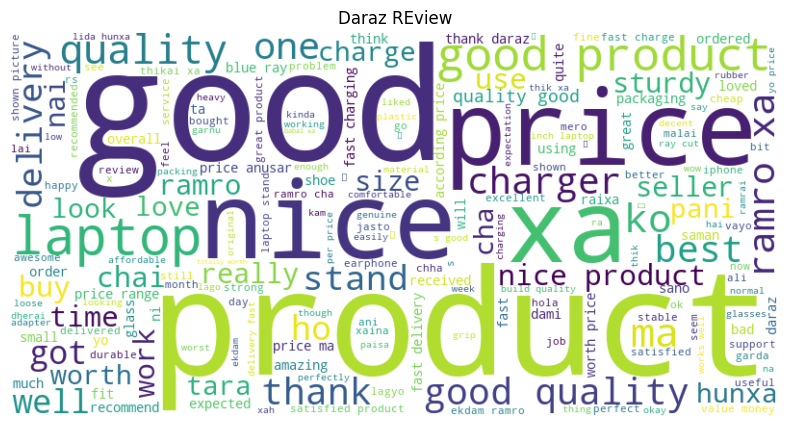

In [28]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(combined_df['review'].astype(str).tolist())

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Daraz REview")
plt.show()


In [31]:
#lowercase
combined_df['review']=combined_df['review'].astype(str)

In [32]:
combined_df['review']=combined_df['review'].apply(lambda x:x.lower())

In [ ]:
#remove punctuation
import string

def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

combined_df['review']=combined_df['review'].apply(remove_punctuation)

combined_df


,review,rating
0,overall this laptop stand does the job but the...,Positive
1,product is good and functions nice rubber atta...,Positive
2,quality 105 best lageyo ani finishing pani dhi...,Positive
3,well it works well its really good for gaming...,Positive
4,the product is exact as shown in the picture d...,Positive
...,...,...
1659,its good,Positive
1661,average,Positive
1662,too good,Positive
1663,nice 👍,Positive


In [36]:
#handling emoji
import emoji
def emoji_to_text(text):
    return emoji.demojize(text)


combined_df['review']=combined_df['review'].apply(emoji_to_text)

combined_df


,review,rating
0,overall this laptop stand does the job but the...,Positive
1,product is good and functions nice rubber atta...,Positive
2,quality 105 best lageyo ani finishing pani dhi...,Positive
3,well it works well its really good for gaming...,Positive
4,the product is exact as shown in the picture d...,Positive
...,...,...
1659,its good,Positive
1661,average,Positive
1662,too good,Positive
1663,nice :thumbs_up:,Positive


In [40]:
def handling_symbol(text):
    text = text.replace(":", "")
    return text.replace("_"," ")


combined_df['review']=combined_df['review'].apply(handling_symbol)

combined_df


,review,rating
0,overall this laptop stand does the job but the...,Positive
1,product is good and functions nice rubber atta...,Positive
2,quality 105 best lageyo ani finishing pani dhi...,Positive
3,well it works well its really good for gaming...,Positive
4,the product is exact as shown in the picture d...,Positive
...,...,...
1659,its good,Positive
1661,average,Positive
1662,too good,Positive
1663,nice thumbs up,Positive


In [50]:
def contains_devanagari(text: str) -> bool:
    return any('\u0900' <= ch <= '\u097F' for ch in text)


# import the module
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

# the text to be transliterated
text = "ramro xa product delivery dhilo xa"

# printing the transliterated text
print(transliterate(text, sanscript.ITRANS, sanscript.DEVANAGARI))




रम्रो क्ष प्रोदुच्त् देलिवेर्य् धिलो क्ष


In [56]:
combined_df[1199:]

,review,rating
1289,good glass according to its price and value fo...,Positive
1290,parcel got two day early quality is justified ...,Positive
1291,सर्भिस सब ठीक छ तर सामानहरूको साइज पनि राख्नु ...,Positive
1292,blue light block garxa vanera kine ko total wa...,Positive
1293,nice one physically but i wanted to ask the se...,Positive
...,...,...
1659,its good,Positive
1661,average,Positive
1662,too good,Positive
1663,nice thumbs up,Positive


In [ ]:
import re
ROMAN_TO_DEVANAGARI = {
    "xa": "छ",
    "xaina": "छैन",
    "cha": "छ",
    "chha": "छ",
    "ramro": "राम्रो",
    "dhilo": "ढिलो",
    "dherai": "धेरै",
    "ramroo": "राम्रो",
}

def reduce_repeated_chars(word):
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

def normalize_word(word):
    word = reduce_repeated_chars(word)
    if word in ROMAN_TO_DEVANAGARI:
        return ROMAN_TO_DEVANAGARI[word]
    return word

def normalize_review(text):
    words = text.split()
    normalized_words = [normalize_word(w) for w in words]
    return ' '.join(normalized_words)








Original: ramro xa product
Normalized: राम्रो छ product
----------------------------------------
Original: delivery dherai dhilo xa!
Normalized: delivery धेरै ढिलो xa!
----------------------------------------
Original: product ramro xa
Normalized: product राम्रो छ
----------------------------------------
Original: best product ever
Normalized: best product ever
----------------------------------------
Original: xaina service
Normalized: छैन service
----------------------------------------


In [ ]:
import re
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate
import nltk
from nltk.stem import WordNetLemmatizer


nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')


from nltk.corpus import words, stopwords

ENGLISH_WORDS = set(words.words())
EN_STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()



ROMAN_TO_DEVANAGARI = {
    "xa": "छ",
    "xaina": "छैन",
    "cha": "छ",
    "chha": "छ",
    "ramro": "राम्रो",
    "ramroo": "राम्रो",
    "dhilo": "ढिलो",
    "dherai": "धेरै",
}


# Detect if a word is all Latin letters

def is_latin(word):
    return all(ord(c) < 128 for c in word)


def is_english(word):
    lemma = lemmatizer.lemmatize(word)
    return lemma in ENGLISH_WORDS




def normalize_word(word):


    word_lower = re.sub(r'(.)\1{2,}', r'\1\1', word)
    
    if word_lower in EN_STOPWORDS:
        return ""

    if is_latin(word) and not is_english(word):
        if word_lower in ROMAN_TO_DEVANAGARI:

            return ROMAN_TO_DEVANAGARI[word_lower]
     
        try:
            return transliterate(word, sanscript.ITRANS, sanscript.DEVANAGARI)
        except:
            return word
    else:
      
        return word

#NORMALIZE FULL REVIEW
def normalize_review(text):
    words_list = text.split()
    normalized_words = [normalize_word(w) for w in words_list if normalize_word(w) != ""]
    return ' '.join(normalized_words)










thumb


[nltk_data] Downloading package words to C:\Users\Roshan
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Roshan
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Roshan
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:

combined_df['review']=combined_df['review'].apply(normalize_review)

combined_df[1199:]


,review,rating
1289,good glass according price value money blue ra...,Positive
1290,parcel got two day early quality जुस्तिफ़िएद् a...,Positive
1291,सर्भिस सब ठीक छ तर सामानहरूको साइज पनि राख्नु ...,Positive
1292,blue light block गर्क्ष वनेर किने ko total was...,Positive
1293,nice one physically वन्तेद् ask seller whether...,Positive
...,...,...
1659,good,Positive
1661,average,Positive
1662,good,Positive
1663,nice थुम्ब्स्,Positive
